In [1]:
from torchvision.datasets import Cityscapes
import torch
from torchvision import models
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define your data transformation (you might need to customize these)
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
])

# change the paths in notebook!

In [7]:
data_path = "/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/train/cityscapes"

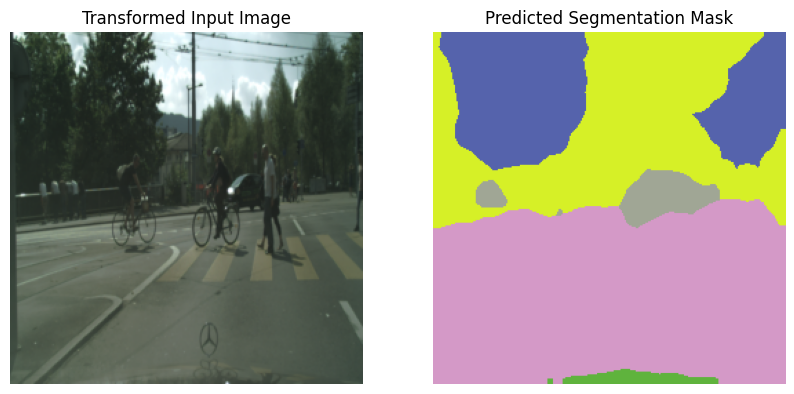

In [6]:
# Load the state dictionary
state_dict = torch.load('model_weights_epoch_1.pth')

# Remove keys related to auxiliary classifiers from the state dictionary
state_dict = {k: v for k, v in state_dict.items() if 'aux_classifier' not in k}

# Create your model and load the modified state dictionary
num_classes = len(Cityscapes.classes)
model = models.segmentation.fcn_resnet101(num_classes=num_classes)
model.load_state_dict(state_dict, strict=False)  # Set strict=False to skip missing keys

# Load the input image
input_image = Image.open(f'Q:/Projects/u-net-segmentation-of-streets-and-cars/train/cityscapes/leftImg8bit/train/zurich/zurich_000006_000019_leftImg8bit.png')

# Apply the necessary transformations
input_tensor = data_transforms(input_image).unsqueeze(0)

# Perform prediction
with torch.no_grad():
    outputs = model(input_tensor)['out']  # Correct 'inputs' to 'input_tensor'
    _, predicted = torch.max(outputs, 1)

# Convert the predicted image tensor to a numpy array
predicted_numpy = predicted.squeeze(0).cpu().numpy()

# Define label colors for 35 classes (replace this with your color mappings)
np.random.seed(42)
label_colors_35_classes = np.random.randint(0, 256, size=(35, 3), dtype=np.uint8)

# Convert the predicted segmentation mask to a colored mask
colored_mask = label_colors_35_classes[predicted_numpy]

# Convert the input tensor back to a numpy array for plotting
input_image_transformed = np.transpose(input_tensor.squeeze(0).cpu().numpy(), (1, 2, 0))

# Plot the transformed input image and the colored mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(input_image_transformed)
axs[0].axis('off')
axs[0].set_title('Transformed Input Image')
axs[1].imshow(colored_mask)
axs[1].axis('off')
axs[1].set_title('Predicted Segmentation Mask')

plt.show()

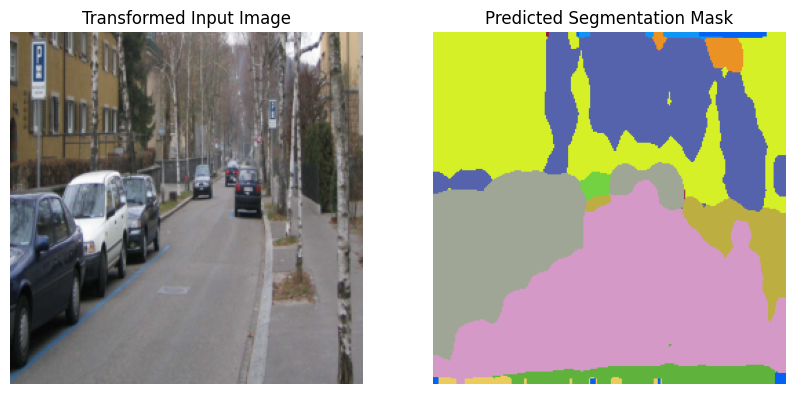

In [3]:
# Load the state dictionary
state_dict = torch.load('/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/train/model_resnet_weights_epoch_38.pth',map_location=torch.device('cpu'))

# Remove keys related to auxiliary classifiers from the state dictionary
state_dict = {k: v for k, v in state_dict.items() if 'aux_classifier' not in k}

# Create your model and load the modified state dictionary
num_classes = len(Cityscapes.classes)
model = models.segmentation.fcn_resnet101(num_classes=num_classes)
model.load_state_dict(state_dict, strict=False)  # Set strict=False to skip missing keys

# Load the input image
input_image = Image.open(f'/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/web/images/image_1_real.jpg')

# Apply the necessary transformations
input_tensor = data_transforms(input_image).unsqueeze(0)

# Perform prediction
with torch.no_grad():
    outputs = model(input_tensor)['out']  # Correct 'inputs' to 'input_tensor'
    _, predicted = torch.max(outputs, 1)

# Convert the predicted image tensor to a numpy array
predicted_numpy = predicted.squeeze(0).cpu().numpy()

# Define label colors for 35 classes (replace this with your color mappings)
np.random.seed(42)
label_colors_35_classes = np.random.randint(0, 256, size=(35, 3), dtype=np.uint8)

# Convert the predicted segmentation mask to a colored mask
colored_mask = label_colors_35_classes[predicted_numpy]

# Convert the input tensor back to a numpy array for plotting
input_image_transformed = np.transpose(input_tensor.squeeze(0).cpu().numpy(), (1, 2, 0))

# Plot the transformed input image and the colored mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(input_image_transformed)
axs[0].axis('off')
axs[0].set_title('Transformed Input Image')
axs[1].imshow(colored_mask)
axs[1].axis('off')
axs[1].set_title('Predicted Segmentation Mask')

plt.show()

In [ ]:
# Create your model and load the modified state dictionary
num_classes = len(Cityscapes.classes)
model = models.segmentation.fcn_resnet101(weights=True)

# Load the input image
input_image = Image.open(f'Q:/Projects/u-net-segmentation-of-streets-and-cars/predict/images/image_1.jpg')

# Apply the necessary transformations
input_tensor = data_transforms(input_image).unsqueeze(0)

# Perform prediction
with torch.no_grad():
    outputs = model(input_tensor)['out']  # Correct 'inputs' to 'input_tensor'
    _, predicted = torch.max(outputs, 1)

# Convert the predicted image tensor to a numpy array
predicted_numpy = predicted.squeeze(0).cpu().numpy()

# Define label colors for 35 classes (replace this with your color mappings)
np.random.seed(42)
label_colors_21_classes = np.random.randint(0, 256, size=(21, 3), dtype=np.uint8)

# Convert the predicted segmentation mask to a colored mask
colored_mask = label_colors_21_classes[predicted_numpy]

# Plot the original input image and the colored mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(input_image)
axs[0].axis('off')
axs[0].set_title('Input Image')
axs[1].imshow(colored_mask)
axs[1].axis('off')
axs[1].set_title('Predicted Segmentation Mask')

In [3]:

# Loop through each epoch
for epoch in range(1, 37):
    # Load the state dictionary for the current epoch
    state_dict = torch.load(f'/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/train/model_resnet_weights_epoch_{epoch}.pth',map_location=torch.device('cpu'))

    # Remove keys related to auxiliary classifiers from the state dictionary
    state_dict = {k: v for k, v in state_dict.items() if 'aux_classifier' not in k}

    # Create your model and load the modified state dictionary
    num_classes = len(Cityscapes.classes)  # Replace with the appropriate number of classes
    model = models.segmentation.fcn_resnet101(num_classes=num_classes)
    model.load_state_dict(state_dict, strict=False)  # Set strict=False to skip missing keys

    # Load the input image for prediction (modify the path as needed)
    input_image = Image.open(f'/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/web/images/image_1_real.jpg')

    # Apply transformations
    input_tensor = data_transforms(input_image).unsqueeze(0)

    # Perform prediction
    with torch.no_grad():
        outputs = model(input_tensor)['out']
        _, predicted = torch.max(outputs, 1)

    # Convert tensors to numpy arrays for visualization
    predicted_numpy = predicted.squeeze(0).cpu().numpy()
    np.random.seed(42)
    label_colors_35_classes = np.random.randint(0, 256, size=(35, 3), dtype=np.uint8)
    colored_mask = label_colors_35_classes[predicted_numpy]
    input_image_transformed = np.transpose(input_tensor.squeeze(0).cpu().numpy(), (1, 2, 0))

    # Plot the transformed input image and the predicted mask
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(input_image_transformed)
    axs[0].axis('off')
    axs[0].set_title(f'Transformed Input Image - Epoch {epoch}')
    axs[1].imshow(colored_mask)
    axs[1].axis('off')
    axs[1].set_title(f'Predicted Segmentation Mask - Epoch {epoch}')

    # Save the figure with a unique filename for each epoch
    plt.savefig(f'resnet_prediction_epoch_{epoch}.png')
    plt.close()  # Close the figure to avoid displaying all plots at once

In [14]:
from PIL import Image
import os

# Folder where the prediction images are stored
folder_path = ''

# Create a list to store each image frame
frames = []
for epoch in range(1, 36):
    # Construct the filename for each epoch
    image_file = f'resnet_prediction_epoch_{epoch}.png'
    image_path = os.path.join(folder_path, image_file)

    # Open each image and append it to the frames list
    frames.append(Image.open(image_path))

# Save the frames as an animated GIF
gif_path = 'resnet_segmentation.gif'  # Path to save the GIF file
frames[0].save(gif_path, format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torchvision.datasets import Cityscapes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define your data transformation (you might need to customize these)
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
])

# Define your target transformation
target_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize target
    transforms.Lambda(lambda img: torch.Tensor(np.array(img))), 
])

# Create Cityscapes validation dataset instance
val_dataset = Cityscapes(root=data_path, split='val', mode='fine', 
                         target_type='semantic', transform=data_transforms, 
                         target_transform=target_transforms)

# Define the loss function
criterion = nn.CrossEntropyLoss()


# Loop through each epoch
for epoch in range(1, 37):
    # Load the state dictionary for the current epoch
    state_dict = torch.load(f'/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/train/model_resnet_weights_epoch_{epoch}.pth',map_location=torch.device('cpu'))

    # Remove keys related to auxiliary classifiers from the state dictionary
    state_dict = {k: v for k, v in state_dict.items() if 'aux_classifier' not in k}

    # Create your model and load the modified state dictionary
    num_classes = len(Cityscapes.classes)  # Replace with the appropriate number of classes
    model = models.segmentation.fcn_resnet101(num_classes=num_classes)
    model.load_state_dict(state_dict, strict=False)  # Set strict=False to skip missing keys

    # Set the model in evaluation mode
    model.eval()

    total_loss = 0.0
    total_loss = 0.0
    num_samples = 20  # Number of random samples per epoch

    # Sample 20 random indices from the validation dataset
    random_indices = np.random.choice(len(val_dataset), num_samples, replace=False)
    
    for i in random_indices:
        input_image, target = val_dataset[i]

        # Add batch dimension to the input image
        input_image = input_image.unsqueeze(0)

        # Perform prediction
        with torch.no_grad():
            outputs = model(input_image)['out']
            loss = criterion(outputs, target.unsqueeze(0).long())  # Calculate the loss

        total_loss += loss.item()

    # Calculate the average loss for the epoch
    avg_loss = total_loss / num_samples
    print(f"Validation Loss - Epoch {epoch}: {avg_loss:.4f}")

    # Create a figure for visualization
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))

    # Load the input image for prediction (modify the path as needed)
    input_image = Image.open(f'/Users/severin/Documents/GitHub/u-net-segmentation-of-streets-and-cars/web/images/image_1_real.jpg')

    # Apply transformations
    input_tensor = data_transforms(input_image).unsqueeze(0)

    # Perform prediction
    with torch.no_grad():
        outputs = model(input_tensor)['out']
        _, predicted = torch.max(outputs, 1)

    # Convert tensors to numpy arrays for visualization
    predicted_numpy = predicted.squeeze(0).cpu().numpy()
    np.random.seed(42)
    label_colors_35_classes = np.random.randint(0, 256, size=(35, 3), dtype=np.uint8)
    colored_mask = label_colors_35_classes[predicted_numpy]
    input_image_transformed = np.transpose(input_tensor.squeeze(0).cpu().numpy(), (1, 2, 0))

    # Create a figure for visualization
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(input_image_transformed)
    axs[0].axis('off')
    axs[0].set_title(f'Transformed Input Image - Epoch {epoch}')
    axs[1].imshow(colored_mask)
    axs[1].axis('off')
    axs[1].set_title(f'Predicted Segmentation Mask - Epoch {epoch}')

    loss_text = f'Validation Loss: {avg_loss:.4f}'
    fig.text(0.5, 0.05, loss_text, color='red', fontsize=12, fontweight='bold', ha='center')  # Adjust the position as needed


    # Save the figure with a unique filename for each epoch
    plt.savefig(f'resnet_prediction_epoch_{epoch}.png')
plt.close()  # Close the figure to avoid displaying all plots at once